# Artifical Neural Networks

In [1]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris

## Perceptron

In [2]:
# load data
iris = load_iris()
x = iris.data[:,(2,3)]
y = (iris.target == 0).astype(np.int)

In [3]:
# classifier
clf = Perceptron()
clf.fit(x, y)

prediction = clf.predict([[0.5,2]])

In [4]:
prediction

array([0])

## Multilayer Perceptron

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
fashion = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag",
               "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Coat'

In [12]:
# sequential API

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers

In [19]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 8s 140us/sample - loss: 0.7111 - accuracy: 0.7674 - val_loss: 0.5074 - val_accuracy: 0.8272
Epoch 2/30
55000/55000 [==============================] - 6s 105us/sample - loss: 0.4863 - accuracy: 0.8309 - val_loss: 0.4331 - val_accuracy: 0.8564
Epoch 3/30
55000/55000 [==============================] - 5s 95us/sample - loss: 0.4428 - accuracy: 0.8443 - val_loss: 0.4292 - val_accuracy: 0.8548
Epoch 4/30
55000/55000 [==============================] - 5s 99us/sample - loss: 0.4158 - accuracy: 0.8541 - val_loss: 0.3933 - val_accuracy: 0.8680
Epoch 5/30
55000/55000 [==============================] - 6s 105us/sample - loss: 0.3964 - accuracy: 0.8595 - val_loss: 0.3756 - val_accuracy: 0.8708
Epoch 6/30
55000/55000 [==============================] - 6s 106us/sample - loss: 0.3795 - accuracy: 0.8665 - val_loss: 0.3688 - val_accuracy: 0.8736
Epoch 7/30
55000/55000 [=============================

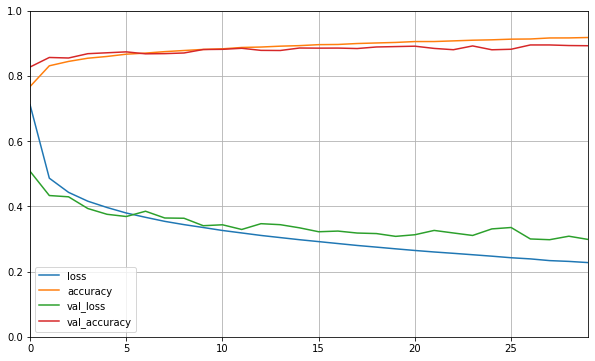

In [23]:
# plotting loss and accuracy

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show();

In [24]:
# evaluate the model on test set

model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 84us/sample - loss: 58.7338 - accuracy: 0.8539


[58.73381297639608, 0.8539]

In [26]:
# using model to make predictions

X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [28]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [29]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [ ]:
## Re